# Problem 1

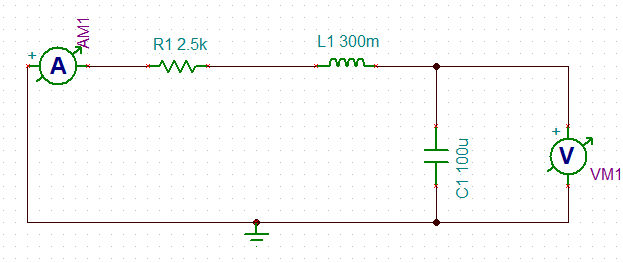

Eq(Vc(t), -0.600576830769337*exp(-8329.33141148792*t) + 0.600576830769337*exp(-4.00192184541462*t))

Eq(Is(t), 0.500240346153891*exp(-8329.33141148792*t) - 0.00024034615389068*exp(-4.00192184541462*t))

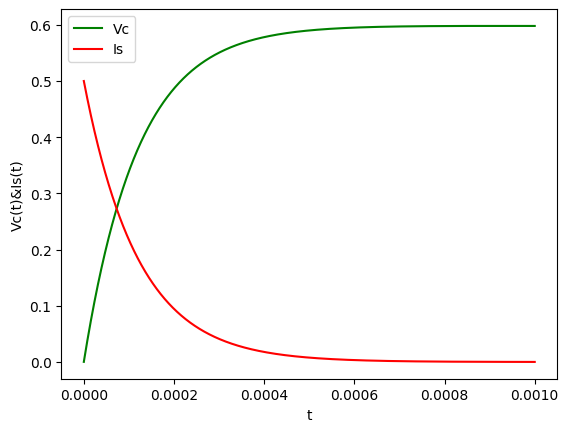

,time(ms),Is,Vc
0,0.0,0.500000,0.000000
1,0.1,0.217250,0.339222
2,0.2,0.094319,0.486571
3,0.3,0.040871,0.550499
4,0.4,0.017634,0.578157
5,0.5,0.007531,0.590046
6,0.6,0.003139,0.595080
7,0.7,0.001229,0.597133
8,0.8,0.000399,0.597890
9,0.9,0.000038,0.598084


In [18]:
# Normal ODE Approch  
from sympy import *
from sympy.abc import t
from matplotlib import pyplot as plt
import numpy as np

R1 = Symbol("R1")
L1 = Symbol("L1")
C1 = Symbol("C1")
# R1 = 2500
# L1 = 300*10**-3
# C1 = 100*10**-6

Vc = Function("Vc")
Is = Function("Is")

eq_v = Eq((R1*C1*Derivative(Vc(t),t))+(L1*C1*Derivative(Vc(t),t,t)) + Vc(t),0)
eq_i = Eq((R1*Derivative(Is(t),t))+(L1*Derivative(Is(t),t,t))+(Is(t)/C1),0)

Ans_v = dsolve(eq_v,Vc(t),ics={Vc(0): 0,
            Derivative(Vc(t),t).subs(t,0) : (500*10**-3)/(100*10**-6)})
Ans_i = dsolve(eq_i,Is(t),ics={Is(0): (500*10**-3),
            Derivative(Is(t),t).subs(t,0) : -1250/(300*10**-3)})

Ans_i = Ans_i.subs({R1:2500,L1:300*10**-3,C1:100*10**-6})
Ans_v = Ans_v.subs({R1:2500,L1:300*10**-3,C1:100*10**-6})
display(Ans_v)
display(Ans_i)

func_v = lambdify(t, Ans_v.rhs,'numpy')
func_i = lambdify(t, Ans_i.rhs,'numpy')


xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)
xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = func_i(xvals_i)

                   
fig, ax = plt.subplots(1,1)     
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot(xvals_i, yvals_i,color='r', label='Is')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Is(t)')
plt.legend()
plt.show()

#table of timesampling
import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Is":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)

Matrix([
[0.500240346153891*exp(-8329.33141148792*t) - 0.000240346153890581*exp(-4.00192184541482*t)],
[  -0.600576830769337*exp(-8329.33141148792*t) + 0.600576830769337*exp(-4.00192184541482*t)]])

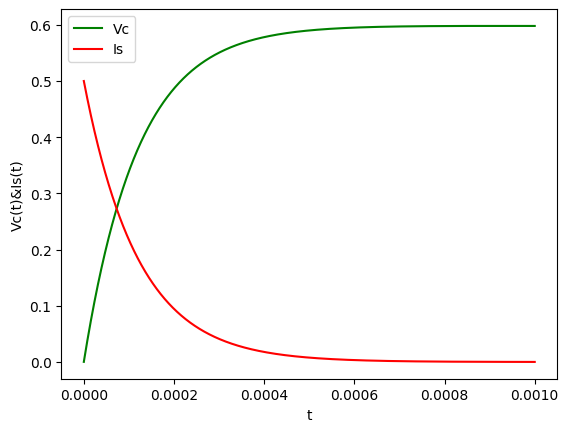

,time(ms),Is,Vc
0,0.0,0.500000,0.000000
1,0.1,0.217250,0.339222
2,0.2,0.094319,0.486571
3,0.3,0.040871,0.550499
4,0.4,0.017634,0.578157
5,0.5,0.007531,0.590046
6,0.6,0.003139,0.595080
7,0.7,0.001229,0.597133
8,0.8,0.000399,0.597890
9,0.9,0.000038,0.598084


In [19]:
# eigenvalue and eigenvector approch
from sympy import *
from sympy.abc import t
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
R1 = 2500
L1 = 300*10**-3
C1 = 100*10**-6

Vc = Function("Vc")
Is = Function("Is")
A = np.array([[(-R1/L1),(-1/L1)],[1/C1,0]])
lambda_1,lambda_2 = npl.eig(A)[0]
eigenvec = npl.eig(A)[1]
IV = np.array([500*10**-3, 0])

C_1, C_2 = npl.solve(eigenvec,IV)

lambda_1_vec = eigenvec[:,0]
lambda_2_Vec = eigenvec[:,1]
sol_h = C_1*lambda_1_vec*exp(lambda_1*t) + C_2*lambda_2_Vec*exp(lambda_2*t)


func_i = lambdify(t,sol_h[0],'numpy')
func_v = lambdify(t,sol_h[1],'numpy')
display(Matrix(sol_h))
xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)
xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = func_i(xvals_i)

fig, ax = plt.subplots(1,1)     
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot(xvals_i, yvals_i,color='r', label='Is')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Is(t)')
plt.legend()
plt.show()

#table of timesampling
import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Is":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)

# Problem 2

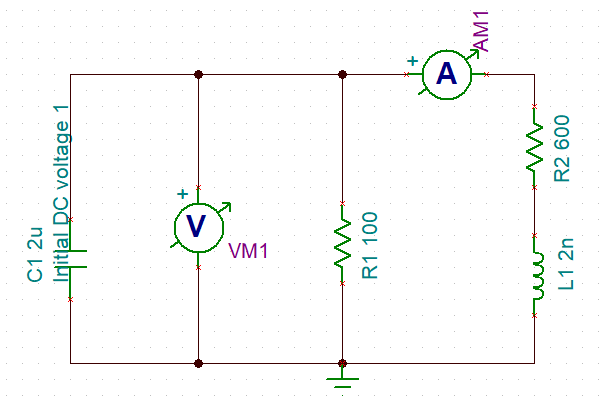

Eq(Vc(t), -2.77777789658984e-9*exp(-299999999166.667*t) + 1.00000000277778*exp(-5833.33334350586*t))

Eq(Il(t), 0)

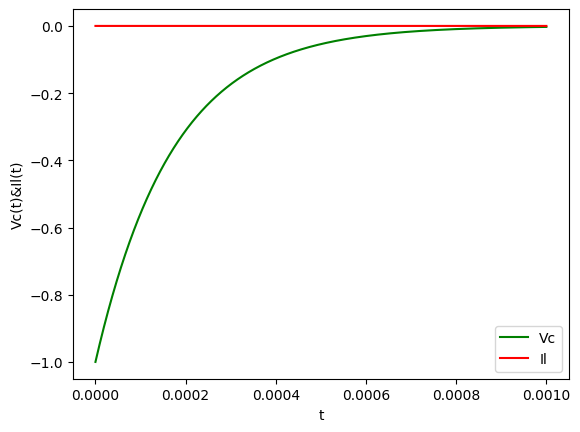

,time(ms),Il,Vc
0,0.0,0,-1.000000
1,0.1,0,-0.558035
2,0.2,0,-0.311403
3,0.3,0,-0.173774
4,0.4,0,-0.096972
5,0.5,0,-0.054114
6,0.6,0,-0.030197
7,0.7,0,-0.016851
8,0.8,0,-0.009404
9,0.9,0,-0.005248


In [16]:
# Normal ODE Approch 
from sympy import *
from sympy.abc import t
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt

Vc = Function("Vc")
Il = Function("Il")

R1 = Symbol("R1")
R2 = Symbol("R2")
L1 = Symbol("L1")
C1 = Symbol("C1")
# R1 = 100
# R2 = 600
# L1 = 2*10**-9
# C1 = 2*10**-6

eq_i = Eq( R1*C1*L1*Derivative(Il(t),t,t) + Derivative(Il(t),t)*(L1+R1*R2*C1)+(R1+R2)*Il(t) ,0) 
Ans_i = dsolve(eq_i,Il(t),ics={Il(0): 0,
                              Derivative(Il(t),t).subs(t,0): 0})

eq_v = Eq(-L1*R1*C1*Derivative(Vc(t),t,t) - Derivative(Vc(t),t)*(R1*R2*C1+L1) - Vc(t)*(R2+R1) ,0)
Ans_v = dsolve(eq_v,Vc(t),ics={Vc(0): 1,
                               Derivative(Vc(t),t).subs(t,0): -1/(R1*C1)})
Ans_i = Ans_i.subs({R1:100,R2:600,L1:2*10**-9,C1:2*10**-6})
Ans_v = Ans_v.subs({R1:100,R2:600,L1:2*10**-9,C1:2*10**-6})
display(Ans_v)
display(Ans_i)
func_v = lambdify(t, -(Ans_v.rhs),'numpy')
#Flip direction
func_i = lambdify(t, (Ans_i.rhs),'numpy')

xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)

xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = [Ans_i.rhs]*len(xvals_i) #IL(t) = 0
                   
fig, ax = plt.subplots(1,1)     
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot( xvals_i,yvals_i,color='r', label='Il')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Il(t)')
plt.legend()
plt.show()

import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Il":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)

Matrix([
[0.0016666667037037*exp(-299999999166.667*t) - 0.0016666667037037*exp(-5833.33334953704*t)],
[ 2.77777789351852e-9*exp(-299999999166.667*t) - 1.00000000277778*exp(-5833.33334953704*t)]])

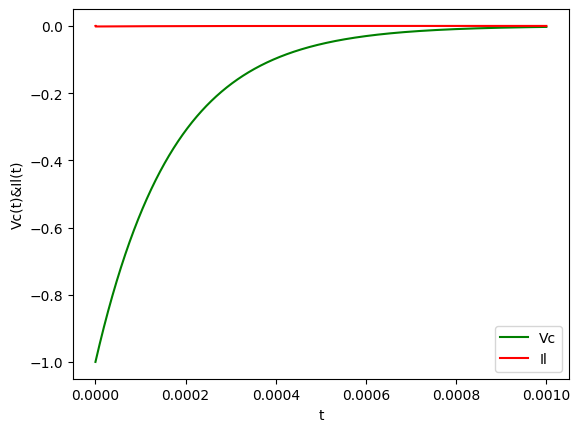

,time(ms),Il,Vc
0,0.0,0.000000,-1.000000
1,0.1,-0.000930,-0.558035
2,0.2,-0.000519,-0.311403
3,0.3,-0.000290,-0.173774
4,0.4,-0.000162,-0.096972
5,0.5,-0.000090,-0.054114
6,0.6,-0.000050,-0.030197
7,0.7,-0.000028,-0.016851
8,0.8,-0.000016,-0.009404
9,0.9,-0.000009,-0.005248


In [17]:
# eigenvalue and eigenvector approch
from sympy import *
from sympy.abc import t
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt

R1 = 100
R2 = 600
L1 = 2*10**-9
C1 = 2*10**-6

A = np.array([[-R2/L1,1/L1],[(-1/C1),(-1/(R1*C1))]])
lambda_1,lambda_2 = npl.eig(A)[0]
eigenvec = npl.eig(A)[1]
IV = np.array([0, 1]) #IL,VC
C1, C2 = npl.solve(eigenvec,IV)
lambda_1_vec = eigenvec[:,0]
lambda_2_vec = eigenvec[:,1]

sol_h = -(C1*lambda_1_vec*exp(lambda_1*t) + C2*lambda_2_vec*exp(lambda_2*t))
#Flip direction
display(Matrix(sol_h))

func_i = lambdify(t,sol_h[0],'numpy')
func_v = lambdify(t,sol_h[1],'numpy')
xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)
xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = func_i(xvals_i)

                   
fig, ax = plt.subplots(1,1)     
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot(xvals_i, yvals_i,color='r', label='Il')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Il(t)')
plt.legend()
plt.show()
import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Il":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)

# Problem 3


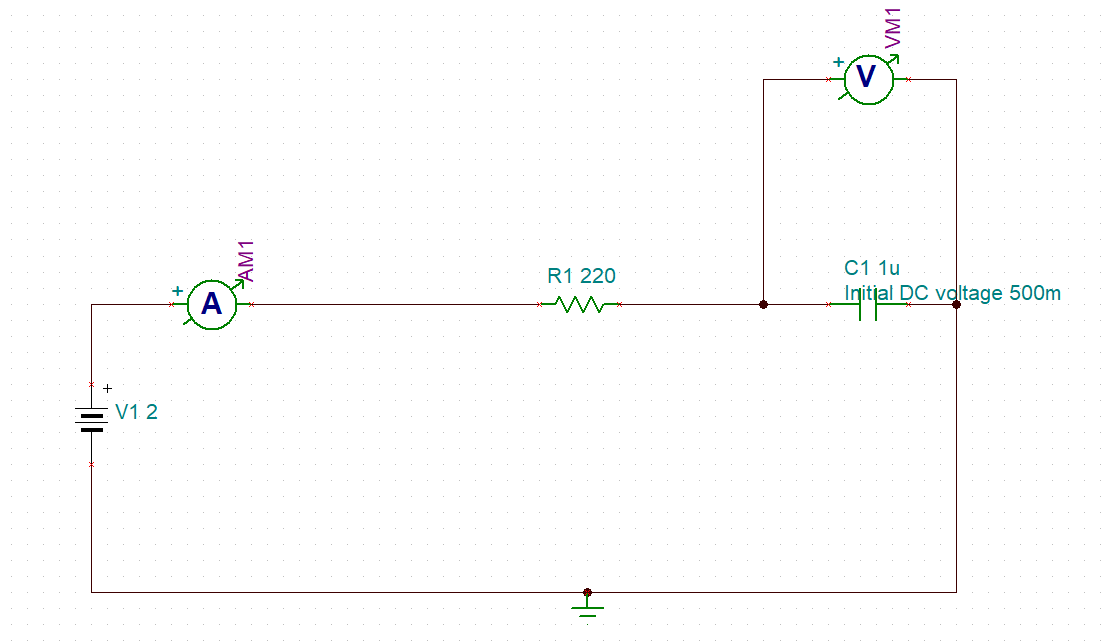

Eq(Vc(t), 2.0 - 1.5*exp(-4545.45454545455*t))

Eq(Is(t), 0.00681818181818182*exp(-4545.45454545455*t))

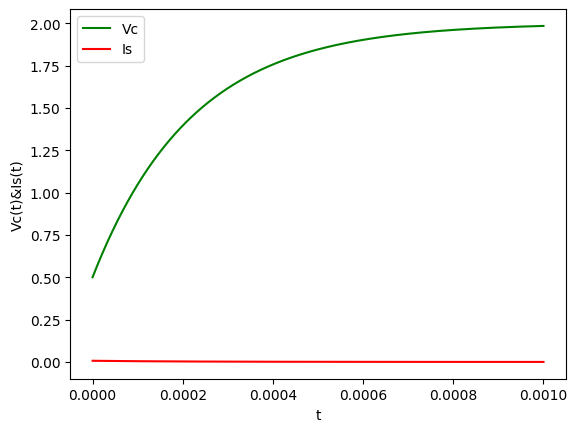

,time(ms),Is,Vc
0,0.0,0.006818,0.500000
1,0.1,0.004328,1.047895
2,0.2,0.002747,1.395665
3,0.3,0.001744,1.616406
4,0.4,0.001107,1.756519
5,0.5,0.000702,1.845454
6,0.6,0.000446,1.901904
7,0.7,0.000283,1.937735
8,0.8,0.000180,1.960478
9,0.9,0.000114,1.974914


In [1]:
#Normal ODE Approch  
from sympy import *
from sympy.abc import t
from matplotlib import pyplot as plt
import numpy as np

Vc = Function("Vc")
Is = Function("Is")
R = 220
C = 10**-6
Vs = 2
Vs_p = 0
eq_i = Eq(Derivative(Is(t),t)+(Is(t)/(R*C)),(Vs_p/R))
eq_v = Eq((Derivative(Vc(t),t)+Vc(t)/(R*C)),Vs/(R*C))

Ans_v = dsolve(eq_v,Vc(t),ics={Vc(0): 0.5})
Ans_i = dsolve(eq_i,Is(t),ics={Is(0): 1.5/R})
display(Ans_v)
display(Ans_i)
func_v = lambdify(t, Ans_v.rhs,'numpy')
func_i = lambdify(t, Ans_i.rhs,'numpy')

xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)
xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = func_i(xvals_i)
fig, ax = plt.subplots(1,1)
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot(xvals_i, yvals_i,color='r', label='Is')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Is(t)')
plt.legend()
plt.show()

#table of timesampling
import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Is":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)

Matrix([
[0.00681818181818182*exp(-4545.45454545455*t)],
[          2.0 - 1.5*exp(-4545.45454545455*t)]])

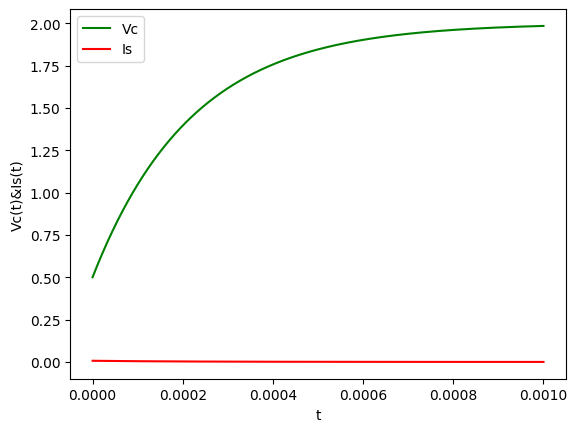

,time(ms),Is,Vc
0,0.0,0.006818,0.500000
1,0.1,0.004328,1.047895
2,0.2,0.002747,1.395665
3,0.3,0.001744,1.616406
4,0.4,0.001107,1.756519
5,0.5,0.000702,1.845454
6,0.6,0.000446,1.901904
7,0.7,0.000283,1.937735
8,0.8,0.000180,1.960478
9,0.9,0.000114,1.974914


In [1]:
# eigenvalue and eigenvector approch
from sympy import *
from sympy.abc import t
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
R = 220
C = 10**-6
Vs = 2
Vs_p = 0
A = np.array([[-1/(R*C),0],[0,-1/(R*C)]])
f = Matrix([[Vs_p/R],[Vs/(R*C)]])
 
lambda_1,lambda_2 = npl.eig(A)[0]
eigenvec = npl.eig(A)[1]
initial = np.array([1.5/R, 0.5]) #Is,Vc
C1, C2 = symbols("C1 C2")
lambda_1_vec = eigenvec[:,0]
lambda_2_vec = eigenvec[:,1]
sol_h = C1*lambda_1_vec*exp(lambda_1*t)  + C2*lambda_2_vec*exp(lambda_2*t)

#Non homogeneous part with Undetermined Coeffienct
A1, A2 = symbols('A1 A2')
Xp = Matrix([[A1],
             [A2]])
eqs= Eq(Xp.diff(t),A*Xp+f)
a1 = solve(eqs,[A1,A2])[A1]
a2 = solve(eqs,[A1,A2])[A2]
Yp = Xp.subs({A1:a1,A2:a2})
sol_nonh = Matrix(sol_h) +Yp
# IV problem t= 0
c1 = solve(Eq(Matrix(initial),sol_nonh.subs(t,0)),(C1,C2))[C1]
c2 = solve(Eq(Matrix(initial),sol_nonh.subs(t,0)),(C1,C2))[C2]
sol_nonh=sol_nonh.subs({C1:c1,C2:c2})
display(sol_nonh)
func_v = lambdify(t, sol_nonh[1],'numpy')
func_i = lambdify(t, sol_nonh[0],'numpy')

xvals_v = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_v = func_v(xvals_v)

xvals_i = np.arange(0,1+0.0001,0.0001)*10**-3
yvals_i = func_i(xvals_i)
fig, ax = plt.subplots(1,1)
ax.plot(xvals_v, yvals_v,color='g', label='Vc')
ax.plot(xvals_i, yvals_i,color='r', label='Is')
ax.set_xlabel('t')
ax.set_ylabel('Vc(t)&Is(t)')
plt.legend()
plt.show()

#table of timesampling
import pandas as pd
time_sampling = np.arange(0,1+0.0001,0.1)*10**-3

data = {"time(ms)":time_sampling/10**-3,
        "Is":func_i(time_sampling),
        "Vc":func_v(time_sampling)}
df = pd.DataFrame(data)

display(df)